In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import os

In [2]:
def model_label_func(model):
    out = ""
    if model == "80free":
        out = "FREE"
    elif model == "quant_8x10":
        out = "RVQ"        
    else:
        out = model
    return out


def first_nonzero(myList):
    a = [i for i, x in enumerate(list(myList)) if x != 0.0]
    if len(a)>0:
        return a[0]
    else:
        return len(myList)
    
def last_nonzero(myList):
    a = [i for i, x in enumerate(list(myList)) if x != 0.0]
    if len(a)>0:
        return a[-1]
    else:
        return None
def order_first_nonzero(myList):
    return [i[0] for i in sorted(enumerate(myList), key=lambda x:first_nonzero(x[1]))]

In [3]:
rootdir = '/lcncluster/lisboa/spikes_audio_diffusion/data'
Data = {}
print(os.listdir(rootdir))
for rootdir, dirs, files in os.walk(rootdir):
    for subdir in dirs:
        dir_path = os.path.join(rootdir, subdir)
        file_path = dir_path + "/metrics.npz"
        if os.path.exists(file_path):
            Data[subdir]={}
            Data[subdir]["sisnr"] = np.load(file_path)["sisnr"]
            Data[subdir]["bps"] = np.load(file_path)["bps"]
            try:
                key = "specMSE"
                dat = np.load(file_path)[key]
            except KeyError:
                print(f"specMSE is not a valid key for {subdir}")
            
            try:
                key = "multispecMAE"
                dat = np.load(file_path)[key]
            except KeyError:
                print(f"multispecMAE is not a valid key for {subdir}")
                
            Data[subdir][key] = dat
            
            try:
                key = "multispecSISNR"
                dat = np.load(file_path)[key]
                multispecSISNR = True
            except KeyError:
                print(f"multispecSISNR is not a valid key for {subdir}")
                multispecSISNR = False
                
            
            if multispecSISNR:
                print("HEY")
                Data[subdir]["multispecSISNR"] = np.load(file_path)["multispecSISNR"] 
            
            if subdir in ["opus6","opus12"]:
                Data[subdir]["bps"]*=1000
            
        """
        file_path = dir_path + "/fads.npz"
        if os.path.exists(file_path):
            print(subdir)
            if subdir not in Data.keys():
                Data[subdir]={}
            
            Data[subdir]['fads'] = np.load(file_path)['fads']
        file_path = dir_path + "/visqol.csv"
        if os.path.exists(file_path):
            print(subdir)
            columns = ['reference','degraded','moslqo']
            data = pd.read_csv(file_path)
            data = data[columns]
            if subdir not in Data.keys():
                Data[subdir]={}
            Data[subdir]['visqol'] = data
        file_path = dir_path + "/visqol_validation.csv"
        if os.path.exists(file_path):
            print(subdir)
            columns = ['reference','degraded','moslqo']
            data = pd.read_csv(file_path)
            data = data[columns]
            if subdir not in Data.keys():
                Data[subdir]={}
            Data[subdir]['visqol'] = data"""


['8842i6', 'infer.yaml', '8841i5_free', 'SPARSE', '8842i6_free', '8821i4_free', '8822i5_free', 'mel', '8822i5', 'corr_midi.yaml', '8821i4', '8841i5', 'FREE', 'RVQ_50', 'bad', 'MEL', '80brute', '80brute50', 'fads.yaml', 'RVQ8x10', 'opus6', 'visqol.yaml', 'visqol_test.csv', 'opus12', 'opus24', 'opus64']
specMSE is not a valid key for 8842i6
HEY
specMSE is not a valid key for 8841i5_free
HEY
specMSE is not a valid key for SPARSE
HEY
specMSE is not a valid key for 8842i6_free
HEY
specMSE is not a valid key for 8821i4_free
HEY
specMSE is not a valid key for 8822i5_free
HEY
multispecMAE is not a valid key for mel
multispecSISNR is not a valid key for mel
specMSE is not a valid key for 8822i5
HEY
specMSE is not a valid key for 8821i4
HEY
specMSE is not a valid key for 8841i5
HEY
specMSE is not a valid key for FREE
HEY
specMSE is not a valid key for RVQ_50
HEY
specMSE is not a valid key for MEL
HEY
specMSE is not a valid key for 80brute
HEY
specMSE is not a valid key for 80brute50
HEY
specMSE 

In [4]:
hide_keys = ['80brute','RVQ_50']

opus6: 4.283114910125732
opus12: 9.208406448364258
FREE: 8.033882141113281
SPARSE: 5.810668468475342
RVQ8x10: 8.079408645629883


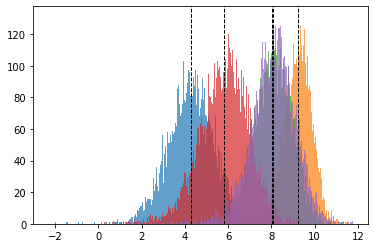

In [19]:
x = Data["opus6"]['multispecSISNR']
_,_,im1 = plt.hist(x,bins = 500,alpha = 0.7)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
print(f"opus6: {x.mean()}")

x=Data["opus12"]['multispecSISNR']
_,_,im2 = plt.hist(x,bins = 500,alpha = 0.7)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
print(f"opus12: {x.mean()}")

x=Data["FREE"]['multispecSISNR']
_,_,im2 = plt.hist(x,bins = 500,alpha = 0.7)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
print(f"FREE: {x.mean()}")


x=Data["SPARSE"]['multispecSISNR']
_,_,im2 = plt.hist(x,bins = 500,alpha = 0.7)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
print(f"SPARSE: {x.mean()}")


x=Data["RVQ8x10"]['multispecSISNR']
_,_,im2 = plt.hist(x,bins = 500,alpha = 0.7)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
print(f"RVQ8x10: {x.mean()}")


plt.show()

In [24]:
def sample_rate_func(model):
    if model[:4] in ["8821","8841","8822","8842"]:
        cum = 1
        for c in model[:4]:
            cum*= int(c)
        print(model,cum)
        return(512/cum)
    elif model[:4] in ["opus"]:
        return 0
    else:
        return 1

model_list = ["8842i6","8842i6_free","8841i5","8841i5_free","8822i5","8822i5_free","8821i4","8821i4_free","RVQ8x10","FREE","80brute50","opus6","opus12"]
colors = ["orange","orange","purple","purple","navy","navy","limegreen","limegreen","r","b","g","k","grey"]

line_sr = ["8842i6","8841i5","8822i5","8821i4"]
line_free = [f"{l}_free" for l in line_sr]


8842i6 512
model: 8842i6
bps: 2.6990146484375 pm 0.9356415405273437
sisnr: 6.972261905670166
msMAE: 0.03183894604444504
8842i6_free 512
model: 8842i6_free
bps: 3.4453125 pm 0.0
sisnr: 9.2860689163208
msMAE: 0.026623953133821487
8841i5 256
model: 8841i5
bps: 3.238575927734375 pm 2.068873046875
sisnr: 6.360104560852051
msMAE: 0.03674831986427307
8841i5_free 256
model: 8841i5_free
bps: 6.890625 pm 0.0
sisnr: 11.369906425476074
msMAE: 0.02276216261088848
8822i5 256
model: 8822i5
bps: 3.258635498046875 pm 2.081221923828125
sisnr: 6.467740058898926
msMAE: 0.031390298157930374
8822i5_free 256
model: 8822i5_free
bps: 6.890625 pm 0.0
sisnr: 10.619603157043457
msMAE: 0.02537943795323372
8821i4 128
model: 8821i4
bps: 3.211027099609375 pm 2.42205078125
sisnr: 5.853400707244873
msMAE: 0.03173493221402168
8821i4_free 128
model: 8821i4_free
bps: 13.78125 pm 0.0
sisnr: 13.465620040893555
msMAE: 0.019443141296505928
model: RVQ8x10
bps: 3.4453125 pm 0.0
sisnr: 11.10641860961914
msMAE: 0.0255320817232131

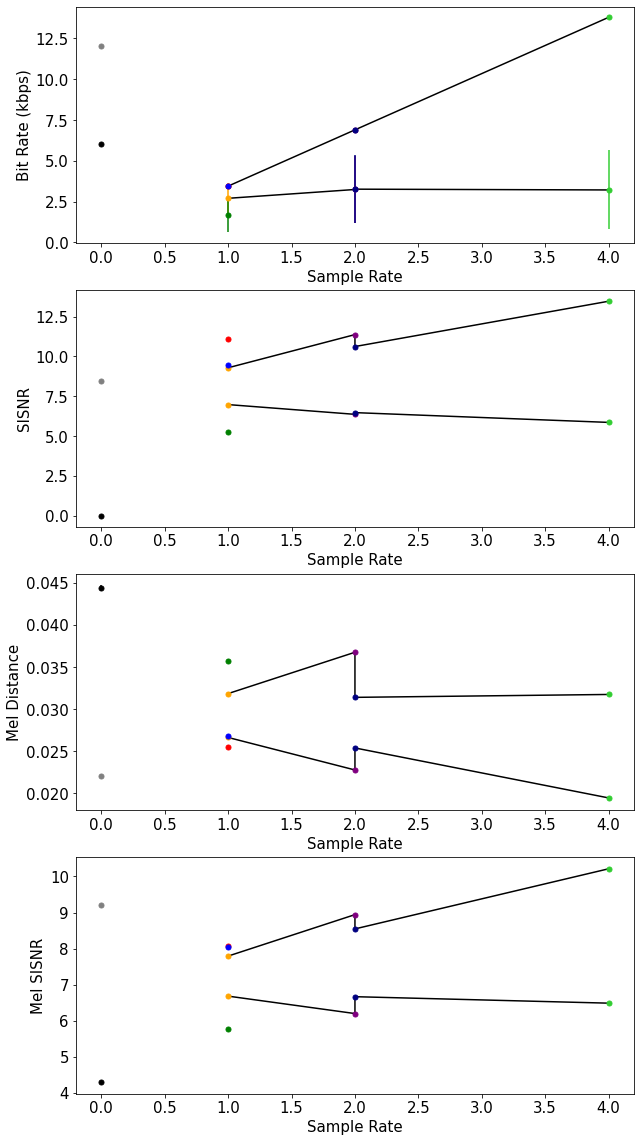

In [25]:
fig,ax = plt.subplots(4,figsize=(10,20))
fs = 15

for i,model in enumerate(model_list):
    samplerate = sample_rate_func(model)
    print(f"model: {model}")
    BPS = Data[model]['bps']/1000
    if BPS.size==1:
        BPS = BPS*np.ones_like(Data["FREE"]["bps"])
    bps,sbps = Data[model]['bps'].mean()/1000,Data[model]['bps'].std()/1000
    sqrtN = np.sqrt(Data[model]['sisnr'].size)
    sisnr,ssisnr = Data[model]['sisnr'].mean(),Data[model]['sisnr'].std()/sqrtN
    msMAE,smsMAE = Data[model]['multispecMAE'].mean(),1.96*Data[model]['multispecMAE'].std()/sqrtN
    try:
        msSISNR,smsSISNR = Data[model]['multispecSISNR'].mean(),1.96*Data[model]['multispecSISNR'].std()/sqrtN       
    except KeyError:
        continue
    MSMAE = Data[model]['multispecMAE']
    print(f"bps: {bps} pm {sbps}")
    print(f"sisnr: {sisnr}")    
    print(f"msMAE: {msMAE}")    

    #ax[0].violinplot(BPS,showmeans = True, showextrema = False,positions = [samplerate])
    ax[0].errorbar(samplerate,bps,yerr=sbps,color = colors[i],marker = '.',label = model,markersize=10) 
    ax[1].errorbar(samplerate,sisnr,yerr=ssisnr,color = colors[i],marker = '.',label = model,markersize=10) 
    ax[2].errorbar(samplerate,msMAE,yerr=smsMAE,color = colors[i],marker = '.',label = model,markersize=10)
    ax[3].errorbar(samplerate,msSISNR,yerr=smsSISNR,color = colors[i],marker = '.',label = model,markersize=10) 
    
    #ax[2].violinplot(MSMAE,showmeans = True, showextrema = False,positions = [samplerate])

for l in [line_sr,line_free]:
    sr = []
    BPS = []
    SISNR = []
    MSMAE = []
    MSSISNR = []
    
    for model in l:
        samplerate = sample_rate_func(model)
        bps,sbps = Data[model]['bps'].mean()/1000,Data[model]['bps'].std()/1000
        sqrtN = np.sqrt(Data[model]['sisnr'].size)
        sisnr,ssisnr = Data[model]['sisnr'].mean(),Data[model]['sisnr'].std()/sqrtN
        msMAE,smsMAE = Data[model]['multispecMAE'].mean(),1.96*Data[model]['multispecMAE'].std()/sqrtN       
        try:
            msSISNR,smsSISNR = Data[model]['multispecSISNR'].mean(),1.96*Data[model]['multispecSISNR'].std()/sqrtN       
        except KeyError:
            continue
        sr.append(samplerate)
        BPS.append(bps)
        SISNR.append(sisnr)
        MSMAE.append(msMAE)
        MSSISNR.append(msSISNR)
        
        
    ax[0].plot(sr,BPS,'k')
    ax[1].plot(sr,SISNR,'k')
    ax[2].plot(sr,MSMAE,'k')
    ax[3].plot(sr,MSSISNR,'k')
    
    
        
#ax[1].legend(ncol = 2,fontsize = fs)
ax[0].set_ylabel("Bit Rate (kbps)", fontsize = fs)
ax[0].yaxis.set_tick_params(labelsize=fs)
ax[0].set_xlabel("Sample Rate", fontsize = fs)
ax[0].xaxis.set_tick_params(labelsize=fs)    


ax[1].set_xlabel("Sample Rate", fontsize = fs)
ax[1].set_ylabel("SISNR", fontsize = fs)
ax[1].yaxis.set_tick_params(labelsize=fs)
ax[1].xaxis.set_tick_params(labelsize=fs)    


ax[2].set_ylabel("Mel Distance", fontsize = fs)
ax[2].set_xlabel("Sample Rate", fontsize = fs)

ax[2].yaxis.set_tick_params(labelsize=fs)
ax[2].xaxis.set_tick_params(labelsize=fs)  


ax[3].set_ylabel("Mel SISNR", fontsize = fs)
ax[3].set_xlabel("Sample Rate", fontsize = fs)

ax[3].yaxis.set_tick_params(labelsize=fs)
ax[3].xaxis.set_tick_params(labelsize=fs)  

8842i6 512
model: 8842i6
bps: 2.6990146484375 pm 0.9356415405273437
sisnr: 6.972261905670166
msMAE: 0.03183894604444504
8842i6_free 512
model: 8842i6_free
bps: 3.4453125 pm 0.0
sisnr: 9.2860689163208
msMAE: 0.026623953133821487
8841i5 256
model: 8841i5
bps: 3.238575927734375 pm 2.068873046875
sisnr: 6.360104560852051
msMAE: 0.03674831986427307
8841i5_free 256
model: 8841i5_free
bps: 6.890625 pm 0.0
sisnr: 11.369906425476074
msMAE: 0.02276216261088848
8822i5 256
model: 8822i5
bps: 3.258635498046875 pm 2.081221923828125
sisnr: 6.467740058898926
msMAE: 0.031390298157930374
8822i5_free 256
model: 8822i5_free
bps: 6.890625 pm 0.0
sisnr: 10.619603157043457
msMAE: 0.02537943795323372
8821i4 128
model: 8821i4
bps: 3.211027099609375 pm 2.42205078125
sisnr: 5.853400707244873
msMAE: 0.03173493221402168
8821i4_free 128
model: 8821i4_free
bps: 13.78125 pm 0.0
sisnr: 13.465620040893555
msMAE: 0.019443141296505928
model: RVQ8x10
bps: 3.4453125 pm 0.0
sisnr: 11.10641860961914
msMAE: 0.0255320817232131

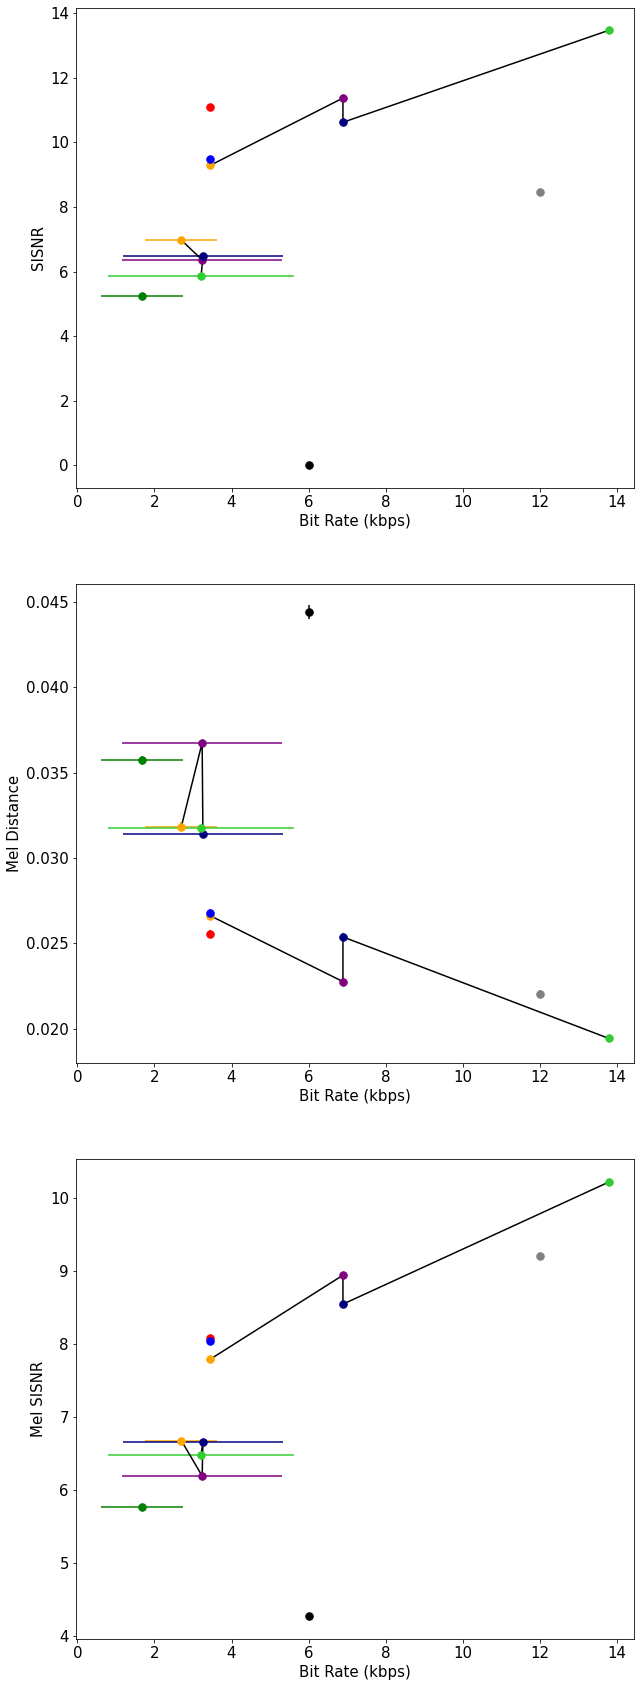

In [26]:
fig,ax = plt.subplots(3,figsize=(10,30))
fs = 15

for i,model in enumerate(model_list):
    samplerate = sample_rate_func(model)
    print(f"model: {model}")
    BPS = Data[model]['bps']/1000
    if BPS.size==1:
        BPS = BPS*np.ones_like(Data["FREE"]["bps"])
    bps,sbps = Data[model]['bps'].mean()/1000,Data[model]['bps'].std()/1000
    sqrtN = np.sqrt(Data[model]['sisnr'].size)

    sisnr,ssisnr = Data[model]['sisnr'].mean(),Data[model]['sisnr'].std()/sqrtN
    msMAE,smsMAE = Data[model]['multispecMAE'].mean(),1.96*Data[model]['multispecMAE'].std()/sqrtN
    try:
        msSISNR,smsSISNR = Data[model]['multispecSISNR'].mean(),1.96*Data[model]['multispecSISNR'].std()/sqrtN       
    except KeyError:
        continue 

    MSMAE = Data[model]['multispecMAE']
    print(f"bps: {bps} pm {sbps}")
    print(f"sisnr: {sisnr}")    
    print(f"msMAE: {msMAE}")    

    ax[0].errorbar(bps,sisnr,yerr=ssisnr,xerr=sbps,color = colors[i],marker = '.',label = model,markersize = 15) 
    ax[1].errorbar(bps,msMAE,yerr=smsMAE,xerr=sbps,color = colors[i],marker = '.',label = model,markersize = 15) 
    ax[2].errorbar(bps,msSISNR,yerr=smsSISNR,xerr=sbps,color = colors[i],marker = '.',label = model,markersize = 15) 
 
for l in [line_sr,line_free]:
    sr = []
    BPS = []
    SISNR = []
    MSMAE = []
    MSSISNR = []
    
    for model in l:
        samplerate = sample_rate_func(model)
        bps,sbps = Data[model]['bps'].mean()/1000,Data[model]['bps'].std()/1000
        sqrtN = 1 #np.sqrt(Data[model]['sisnr'].size)
        sisnr,ssisnr = Data[model]['sisnr'].mean(),Data[model]['sisnr'].std()/sqrtN
        msMAE,smsMAE = Data[model]['multispecMAE'].mean(),Data[model]['multispecMAE'].std()/sqrtN     
        
        try:
            msSISNR,smsSISNR = Data[model]['multispecSISNR'].mean(),1.96*Data[model]['multispecSISNR'].std()/sqrtN       
            MSSISNR.append(msSISNR)
        
        except KeyError:
            continue 
            
        sr.append(samplerate)
        BPS.append(bps)
        SISNR.append(sisnr)
        MSMAE.append(msMAE)
    ax[0].plot(BPS,SISNR,'k')
    ax[1].plot(BPS,MSMAE,'k')
    ax[2].plot(BPS,MSSISNR,'k')
    


ax[0].set_xlabel("Bit Rate (kbps)", fontsize = fs)
ax[0].set_ylabel("SISNR", fontsize = fs)
ax[0].xaxis.set_tick_params(labelsize=fs)    
ax[0].yaxis.set_tick_params(labelsize=fs)


ax[1].set_xlabel("Bit Rate (kbps)", fontsize = fs)
ax[1].set_ylabel("Mel Distance", fontsize = fs)
ax[1].yaxis.set_tick_params(labelsize=fs)
ax[1].xaxis.set_tick_params(labelsize=fs)  

ax[2].set_xlabel("Bit Rate (kbps)", fontsize = fs)
ax[2].set_ylabel("Mel SISNR", fontsize = fs)
ax[2].yaxis.set_tick_params(labelsize=fs)
ax[2].xaxis.set_tick_params(labelsize=fs)  

8842i6
8842i6_free
8841i5
8841i5_free
8822i5
8822i5_free
8821i4
8821i4_free
RVQ8x10
FREE
SPARSE
opus6
opus12


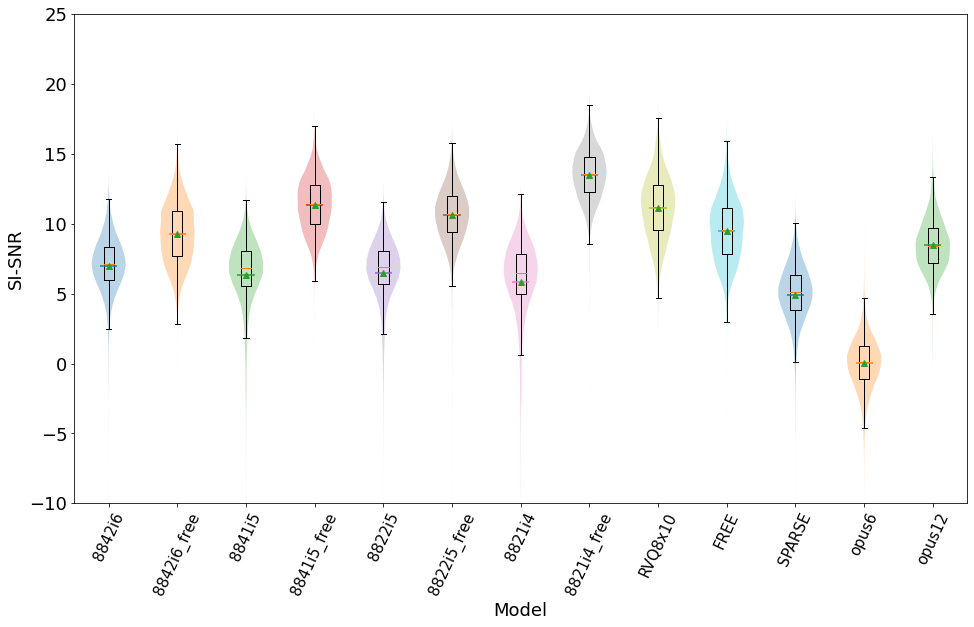

In [28]:
fig,ax = plt.subplots(figsize=(16,9))
labels = []
p = 0
models = ["8842i6","8842i6_free","8841i5","8841i5_free","8822i5","8822i5_free","8821i4","8821i4_free","RVQ8x10","FREE","SPARSE","opus6","opus12"]
for key in models:
    data = Data[key]
    p = p+1
    print(key)
    labels.append(model_label_func(key))
    ax.boxplot(data["sisnr"],showmeans = True, positions = [p],sym='')
    ax.violinplot(data["sisnr"],showmeans = True, showextrema = False,positions = [p])
        
    
ax.set_ylim([-10,25])
ax.set_xlabel("Model",fontsize = 18)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_xticklabels(labels, fontsize=15, rotation=65)

ax.set_ylabel("SI-SNR",fontsize = 18)
ax.yaxis.set_tick_params(labelsize=18)

8842i6 2699.0146 935.64154
8842i6_free 3445.3125 0.0
8841i5 3238.576 2068.873
8841i5_free 6890.625 0.0
8822i5 3258.6355 2081.222
8822i5_free 6890.625 0.0
8821i4 3211.027 2422.0508
8821i4_free 13781.25 0.0
RVQ8x10 3445.3125 0.0
FREE 3445.3125 0.0
SPARSE 1652.187 975.4854
opus6 6000.0 0.0
opus12 12000.0 0.0


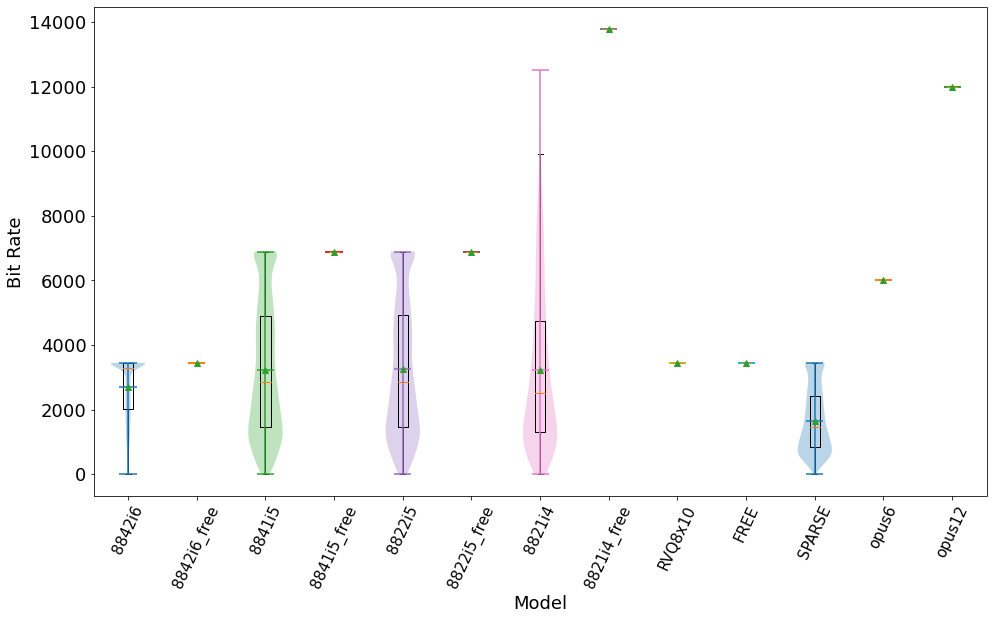

In [29]:
fig,ax = plt.subplots(figsize=(16,9))
labels = []
p = 0
models = ["8842i6","8842i6_free","8841i5","8841i5_free","8822i5","8822i5_free","8821i4","8821i4_free","RVQ8x10","FREE","SPARSE","opus6","opus12"]

for key in models:
    data = Data[key]
    p = p+1
    print(key,data["bps"].mean(),data['bps'].std())
    labels.append(model_label_func(key))
    box = data["bps"]
    if box.shape == ():
        box = box*np.ones(10)
    ax.boxplot(box,showmeans = True, positions = [p],sym='')
    ax.violinplot(box,showmeans = True, positions = [p])
        

ax.set_xlabel("Model",fontsize = 18)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_xticklabels(labels, fontsize=15, rotation=65)

ax.set_ylabel("Bit Rate",fontsize = 18)
ax.yaxis.set_tick_params(labelsize=18)

8842i6 0.031838946 0.013364836
8842i6_free 0.026623953 0.014251353
8841i5 0.03674832 0.009719212
8841i5_free 0.022762163 0.012032653
8822i5 0.0313903 0.011056378
8822i5_free 0.025379438 0.011331744
8821i4 0.031734932 0.011312399
8821i4_free 0.019443141 0.010053232
RVQ8x10 0.025532082 0.01290689
FREE 0.026757183 0.013651312
SPARSE 0.034866925 0.014791824
opus6 0.04439259 0.021973323
opus12 0.022046678 0.012092856


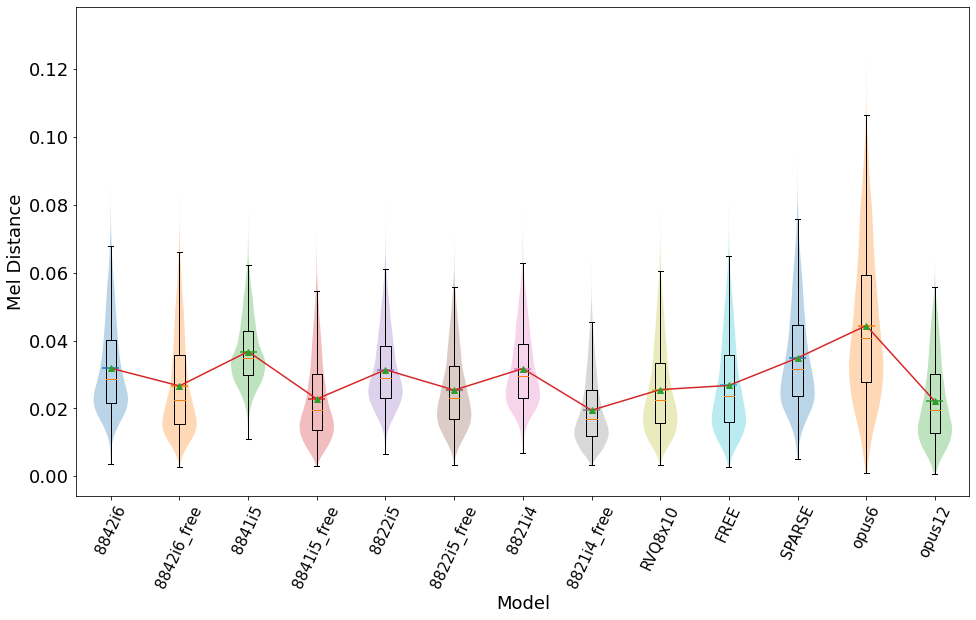

In [30]:
fig,ax = plt.subplots(figsize=(16,9))
labels = []
p = 0
pos = []
means = []
models = ["8842i6","8842i6_free","8841i5","8841i5_free","8822i5","8822i5_free","8821i4","8821i4_free","RVQ8x10","FREE","SPARSE","opus6","opus12"]
for key in models:
    data = Data[key]
    p = p+1
    print(key,data["multispecMAE"].mean(),data['multispecMAE'].std())
    labels.append(model_label_func(key))
    box = data["multispecMAE"]
    if box.shape == ():
        box = box*np.ones(10)
    ax.boxplot(box,showmeans = True, positions = [p],sym='')
    ax.violinplot(box,showmeans = True, showextrema = False, positions = [p])
    pos.append(p)
    means.append(data["multispecMAE"].mean())

ax.set_xlabel("Model",fontsize = 18)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_xticklabels(labels, fontsize=15, rotation=65)
ax.plot(pos,means)
ax.set_ylabel("Mel Distance",fontsize = 18)
ax.yaxis.set_tick_params(labelsize=18)

8842i6 6.677774 0.9990379
8842i6_free 7.7900386 0.97846675
8841i5 6.193825 1.2226769
8841i5_free 8.940951 0.8780562
8822i5 6.6622796 1.2562723
8822i5_free 8.544622 0.9448215
8821i4 6.482598 1.313448
8821i4_free 10.213912 0.9123419
RVQ8x10 8.079409 1.0694824
FREE 8.033882 0.9590378
SPARSE 5.8106685 1.1726074
opus6 4.283115 1.0617155
opus12 9.208406 0.66561097


(0.0, 14.0)

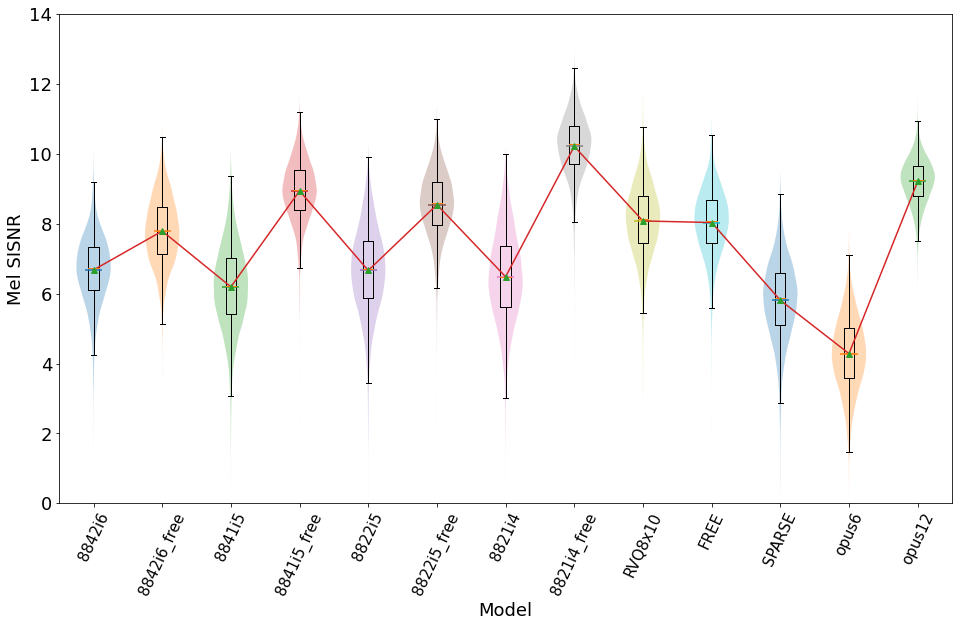

In [32]:
fig,ax = plt.subplots(figsize=(16,9))
labels = []
p = 0
pos = []
means = []
models = ["8842i6","8842i6_free","8841i5","8841i5_free","8822i5","8822i5_free","8821i4","8821i4_free","RVQ8x10","FREE","SPARSE","opus6","opus12"]
for key in models:
    data = Data[key]
    p = p+1
    print(key,data["multispecSISNR"].mean(),data['multispecSISNR'].std())
    labels.append(model_label_func(key))
    box = data["multispecSISNR"]
    if box.shape == ():
        box = box*np.ones(10)
    ax.boxplot(box,showmeans = True, positions = [p],sym='')
    ax.violinplot(box,showmeans = True, showextrema = False, positions = [p])
    pos.append(p)
    means.append(data["multispecSISNR"].mean())

ax.set_xlabel("Model",fontsize = 18)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_xticklabels(labels, fontsize=15, rotation=65)
ax.plot(pos,means)
ax.set_ylabel("Mel SISNR",fontsize = 18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim([0,14])

# Predictive Coding stuff

In [33]:
from scipy.ndimage import gaussian_filter1d
from scipy import signal
from scipy.stats import skew

In [34]:
rootdir = '/lcncluster/lisboa/spikes_audio_diffusion/data'
model_names = ["FREE","80brute","80brute50","SPARSE"]#"80trough4","80full4","1024troughA4","80fpfull4"]

models = [f"{rootdir}/{m}" for m in model_names]
Data = {}
for i,model in enumerate(model_names):
    filepath = models[i]+'/pred_code.npz'
    Data[model] = {}
    #spikes = np.load(filepath)["bottleneck"]
    Data[model]["sisnr"] = np.load(filepath)["sisnr"]
    Data[model]["bps"] = np.load(filepath)["bps"]
    Data[model]["names"] = np.load(filepath)["names"]
    Data[model]["spec_in"] = np.load(filepath)["spec_in"][:,:,:,:200]
    Data[model]["spec_out"] = np.load(filepath)["spec_out"][:,:,:,:200]
    Data[model]["latent"] = np.load(filepath)["latent"][:,:,:200]
    #print(f"{model}, SI-SNR {Data[model]['sisnr'][-1]}")

(128, 122)
(80, 122)
0.02535648090068725
(128, 122)
(80, 122)
0.09526522365559975
(128, 122)
(80, 122)
0.0810695882511987


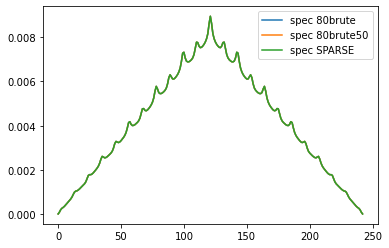

In [35]:
model = model_names[1]
for model in model_names[1:]:
    spec = Data[model]["spec_in"][0,0][:,42:164]
    print(spec.shape)
    autocorr_spec = np.array([signal.correlate(a,a) for a in spec]).sum(0)/spec.shape[0]

    spikes = Data[model]["latent"][0][:,42:164]
    print(spikes.shape)
    autocorr_spike = np.array([signal.correlate(a,a) for a in spikes]).sum(0)/spikes.shape[0]
    lags = signal.correlation_lags(spikes.shape[-1],spikes.shape[-1])

    corr = np.array([signal.correlate(a,b) for a in spikes for b in spec]).sum(0)/(spikes.shape[0]*spec.shape[0])
    plt.plot(autocorr_spec/autocorr_spec.sum(),label = f'spec {model}')
    #plt.plot(autocorr_spike/autocorr_spike.sum(),label = f'spikes {model}')
    #plt.plot(lags,corr/corr.sum(),label = model)
    print(skew(corr))
plt.legend()

In [36]:
print(Data["FREE"]["names"])

['pred_22050' 'unpred_22050' 'pred_Bb5_22050' 'pred_lF_22050'
 'unpred_lF_A_22050' 'unpred_G_22050' 'unpred_lF_22050'
 'unpred_swap_22050']


0
S = 235.0
1
S = 230.0


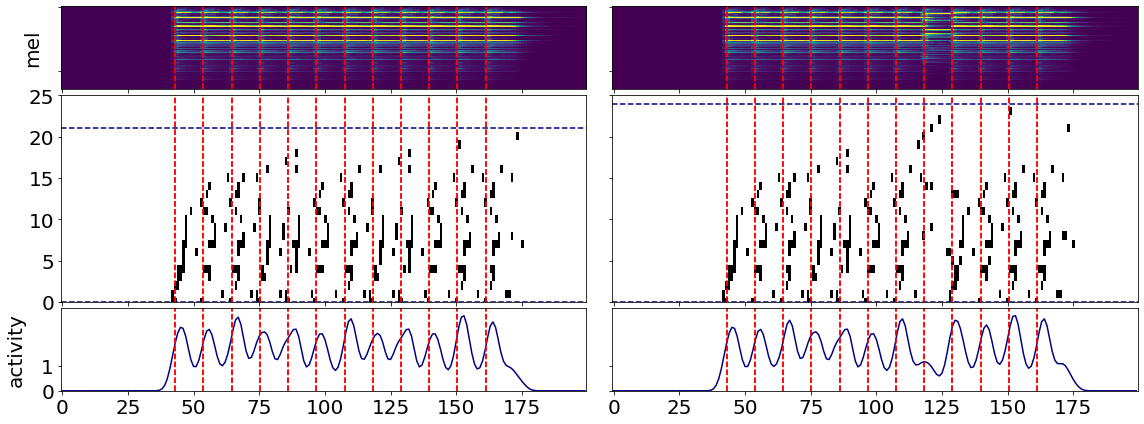

In [40]:
idx = 0
model_names = ["SPARSE"]

h = [[1.]]
for _ in model_names:
    h.append([2.5,1])
#print(h)
hr = [r for sr in h for r in sr]
#print(hr)
fig,ax = plt.subplots(1 + 2*len(model_names),2,figsize = (16,6),sharex = True, gridspec_kw={'height_ratios': hr})
fs = 20
onset = 43
donset = 10.75

mMac = []
mMneuron = []
epsilon = 10.4


#[0,1] for original
#[2,-1] for swap
#[3,4] for lF A
for ind,idx in enumerate([3,4]):
    print(ind)
    mMac.append([])
    mMneuron.append([])
    
    for i,model in enumerate(model_names):
        spec = np.log(1+epsilon*Data[model]['spec_in'][idx][0])
        #print(np.max(spec))
        ax[0][ind].imshow(spec,interpolation = 'none',aspect='auto',vmax = 1)
        ax[0][ind].yaxis.set_tick_params(labelsize=fs)
        ax[0][0].set_ylabel(f"mel",labelpad = 15)
        ax[0][ind].yaxis.label.set_fontsize(fs)
        ax[0][ind].yaxis.set_tick_params(labelleft = False)
        test = np.array(sorted(Data[model]['latent'][idx], key = first_nonzero))
        #print(model)
        tf = test.shape[-1]
        N = test.shape[0]
        S = test.sum()

        ν = S/(N*tf)
        print(f"S = {S}")
        #print(f"tf = {tf}")    
        ##print(f"N = {N}")
        #print(f"ν = {ν}")

        coord_list = S*(np.ceil(np.log2(N))+np.ceil(np.log2(tf)))
        comp_neuron = S*np.ceil(np.log2(tf))+(N+1)*np.ceil(np.log2(S))
        comp_time = S*np.ceil(np.log2(N))+(tf+1)*np.ceil(np.log2(S))

        #print(f"B_free = {N*tf} bits")
        #print(f"B_coordinated list = {coord_list} bits")
        #print(f"B_comp_neuron      = {comp_neuron} bits")
        #print(f"B_comp_t           = {comp_time} bits")



        count = 0
        for b in test:
            if first_nonzero(b) != len(b):
                count += 1

        first_neuron = 0
        last_neuron = count


        test = test[first_neuron:last_neuron,:]



        ax[2*i+1][ind].imshow(test,cmap = "Greys",interpolation = "none",aspect = 'auto')
        if idx ==0:
            ax[2*i+1][ind].yaxis.label.set_fontsize(fs)
            ax[2*i+1][ind].set_ylabel(f"Neuron",labelpad = 15)
            
        ax[2*i+1][ind].yaxis.set_tick_params(labelsize=fs)


        fnzs = [last_nonzero(test.T[onset-i]) for i in range(2)]

        fnzs = [fn for fn in fnzs if fn is not None]
        lnzs = [last_nonzero(test.T[onset+i]) for i in range(round(donset*0.2))]
        lnzs = [ln for ln in lnzs if ln is not None]

        #first_neuron = min(np.array(fnzs))
        #last_neuron = max(np.array(lnzs))
        #test = test[first_neuron:last_neuron,:]




        σ = 2.
        ac = gaussian_filter1d(test.sum(0), σ)#/(last_neuron-first_neuron)
        mMac[ind].append([min(ac)*0.9,max(ac)*1.1])
        mMneuron[ind].append([0,last_neuron])
        
        ax[2*i+2][ind].plot(ac,color = "navy")
        if ind == 0:
            ax[2*i+2][ind].yaxis.label.set_fontsize(fs)
            ax[2*i+2][ind].set_ylabel("activity",rotation =90,labelpad = 15)
        
        else:
            m = min(mMac[0][i][0],mMac[1][i][0])
            M = max(mMac[0][i][1],mMac[1][i][1])
            ax[2*i+2][0].set_ylim([m,M])
            ax[2*i+2][1].set_ylim([m,M])
            
            m = min(mMneuron[0][i][0],mMneuron[1][i][0])
            M = max(mMneuron[0][i][1],mMneuron[1][i][1])
            ax[2*i+1][0].set_ylim([m,M+1])
            ax[2*i+1][1].set_ylim([m,M+1])
            
        ax[2*i+1][ind].axhline(y=first_neuron,color = 'navy',linestyle ='--')
        ax[2*i+1][ind].axhline(y=last_neuron,color = 'navy',linestyle ='--')  
        
        ax[2*i+2][ind].yaxis.set_ticks([0,1])
        ax[2*i+2][ind].yaxis.set_tick_params(labelsize=fs)
        ax[2*i+2][ind].yaxis.set_tick_params(labelsize=fs)
        
        ax[2*i+1][1].tick_params(
            axis='y',         # changes apply to the y-axis
            which='both',     # both major and minor ticks are affected
            left=True,       # ticks along the left edge are off
            right=False,      # ticks along the top edge are off
            labelleft = False)  
        
        ax[2*i+2][1].tick_params(
            axis='y',         # changes apply to the y-axis
            which='both',     # both major and minor ticks are affected
            left=True,       # ticks along the left edge are off
            right=False,      # ticks along the top edge are off
            labelleft = False)  


    ax[-1][ind].xaxis.set_tick_params(labelsize=fs)
    for aa in ax:
        for a in aa:    
            for i in range(12):
                a.axvline(x=onset+donset*i,color = 'r',linestyle ='--')
                
fig.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace = 0.05)

plt.savefig(f'images/pred_unpred_code.png',transparent = True)
plt.savefig(f'images/pred_unpred_code.svg',transparent = True)

0.01794453


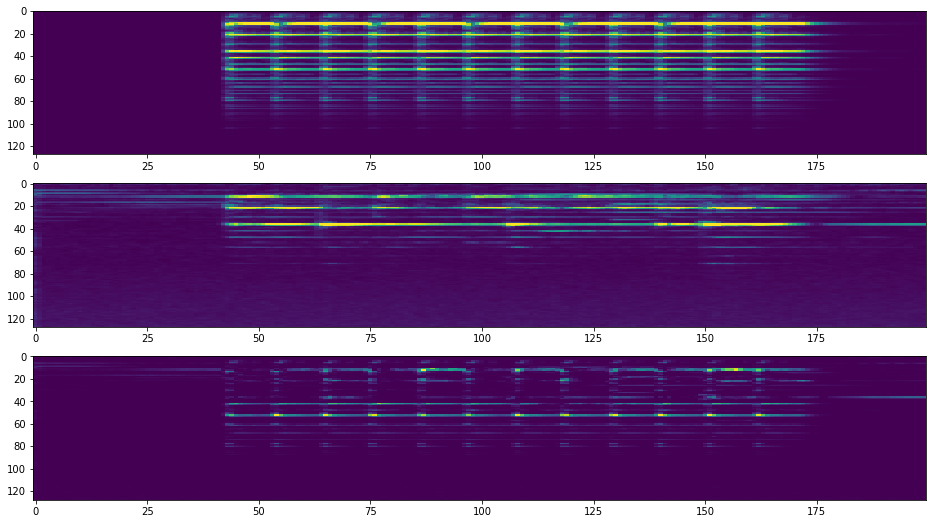

In [38]:
idx = 0
model_names = ["SPARSE"]
model = model_names[0]
fig,ax = plt.subplots(3, figsize = (16,9))
epsilon = 10
spec_in = np.log(1+epsilon*Data[model]['spec_in'][idx][0])
spec_out = np.log(1+epsilon*Data[model]['spec_out'][idx][0])
diff = ((spec_in - spec_out))**2

print(diff.mean())
ax[0].imshow(spec_in ,interpolation = 'none',aspect='auto',vmax = 1)
ax[1].imshow(spec_out,interpolation = 'none',aspect='auto',vmax = 1)
ax[2].imshow(diff,interpolation = 'none',aspect='auto',vmax = 1)

In [ ]:
def coord_list_thr(N,tf):
    lN = np.ceil(np.log2(N))
    lT = np.ceil(np.log2(tf))
    
    return 1/(lN + lT)

def comp_neuron_thr(N,tf):
    lN = np.ceil(np.log2(N))
    lT = np.ceil(np.log2(tf))
    lNT = np.ceil(np.log2(N*tf))
    
    return 1/lT - (N+1)/(N*tf) * lNT/lT

def comp_time_thr(N,tf):
    return comp_neuron_thr(tf,N)

In [ ]:
N = 4096
tf = 256

print(f"C - list    ν < {coord_list_thr(N,tf)}")
print(f"Comp Neuron ν < {comp_neuron_thr(N,tf)}")
print(f"Comp Time   ν < {comp_time_thr(N,tf)}")

Nrange = np.arange(0,2**12)
plt.plot(Nrange,coord_list_thr(Nrange,tf))
plt.plot(Nrange,comp_neuron_thr(Nrange,tf))
plt.plot(Nrange,comp_time_thr(Nrange,tf))
plt.ylim([0,0.15])
plt.xlim([0,512])


# Music Stuff

In [152]:
rootdir = '/lcncluster/lisboa/spikes_audio_diffusion/data'

model_names = ["80free","80brute50"]

models = [f"{rootdir}/{m}" for m in model_names]
Data = {}
for i,model in enumerate(model_names):
    filepath = models[i]+'/midi_corr.npz'
    Data[model] = {}
    Data[model]['corr'] = np.load(filepath)['corr']
    #print(Data[model]['corr'].shape)


In [153]:
def peak_prominence(corr):
    N_neuron, N_notes, N_lags = corr.shape
    zero_lag_idx = int(N_lags/2)
    peak_w = 5
    pp = corr[:,:,(zero_lag_idx-peak_w):(zero_lag_idx+peak_w)].sum(2)/(corr.sum(2) + 1e-5)
    return pp
def get_lags(corr):
    N_neuron, N_notes, N_lags = corr.shape
    lags = np.arange(-int(N_lags/2),int(N_lags/2)+1)
    return lags

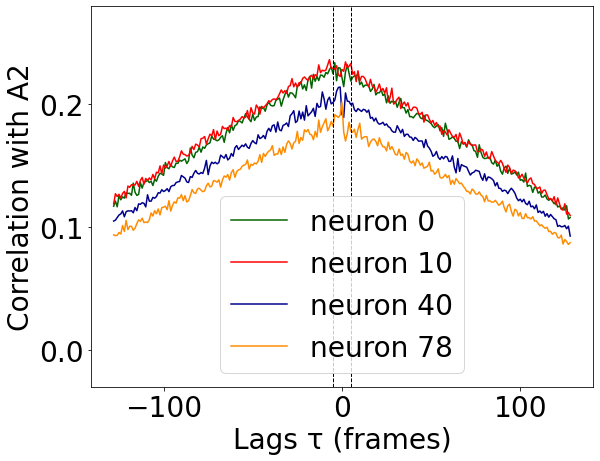

In [174]:
model = model_names[0]
fs = 28
corr = Data[model]['corr']
pp = peak_prominence(corr)
pp = pp/(pp.sum(1)[:,None]+1e-7)
note = 45
note_test = note
corr_note = corr[:,note,:]
inds = pp[:,note].argsort()
corr_note = corr_note[inds]#/(corr_note.sum(1)[:,None]+1e-7)
lags = get_lags(corr)
cmap = mpl.colormaps["jet"]

colors = ["darkgreen","r","darkblue","darkorange"]
n = 3
#neurons = np.array(range(n+1))/n
neurons = np.array(range(75,80))/80
fig, ax = plt.subplots(1,figsize=(9,7))
for i,z in enumerate([0,10,40,78]):
    ax.plot(lags,corr_note[z,:],color = colors[i],label = "neuron %d"%z)

ax.legend(fontsize=fs)
ax.set_xlabel("Lags τ (frames)",fontsize=fs)
ax.set_ylabel("Correlation with A2",fontsize=fs)
ax.yaxis.set_tick_params(labelsize=fs)
ax.xaxis.set_tick_params(labelsize=fs)
for xx in [-5,5]:
    ax.axvline(x = xx,color = 'k',linestyle='--',linewidth = 1.)
ax.set_ylim([-0.03,0.28])
plt.savefig(f"images/corr_{model}.svg",transparent = True)
plt.show()

In [150]:
cmap =  mpl.colormaps['RdBu_r']

import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
MAX = 0.1
MID =0.01
NORM = MidpointNormalize(midpoint=MID,vmin=0,vmax=MAX)
print(NORM(0.009))


0.44999999999999996


### Plot with colormap normalizaion

[4, 4, 3]
15
15


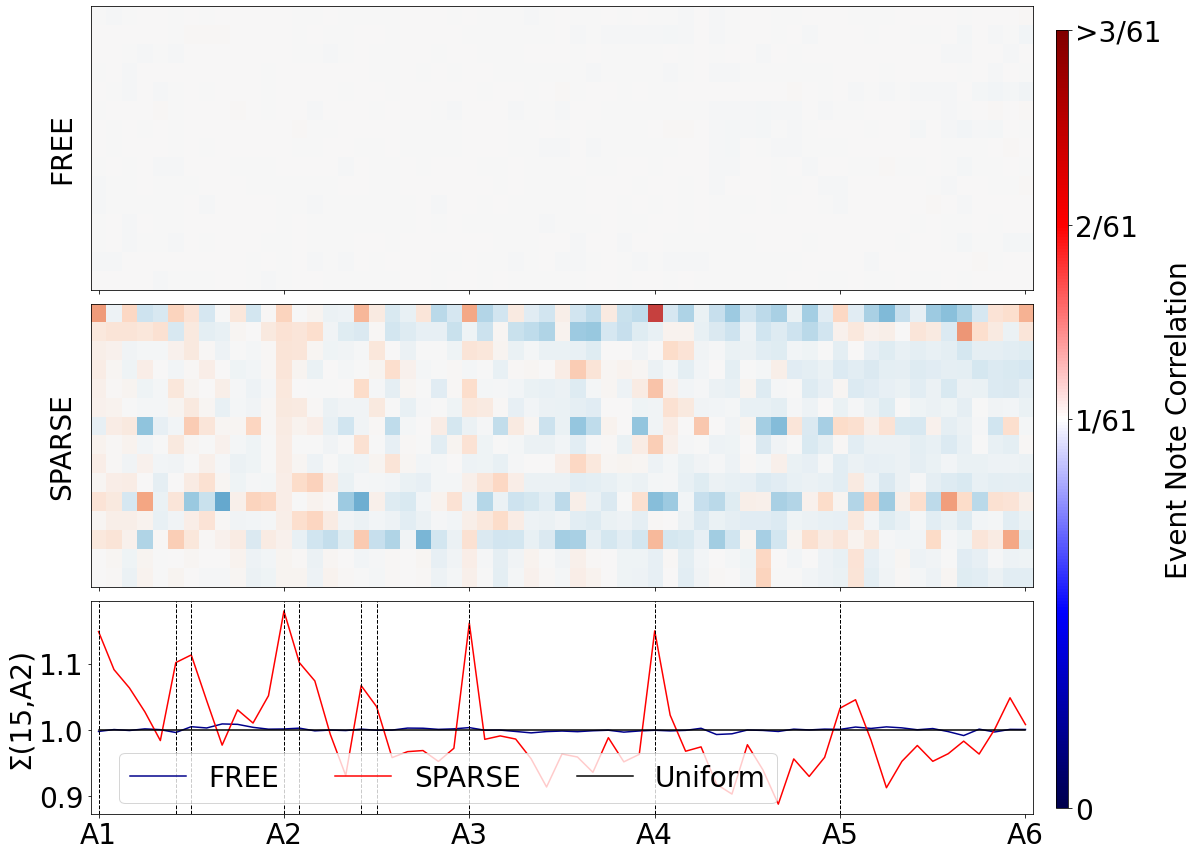

In [151]:
model_names = model_names[:2]

hr = list(4*np.ones(len(model_names),dtype = int))
hr.append(3)
print(hr)
fig,ax = plt.subplots(1+len(model_names),figsize=(16,12),sharex = True,gridspec_kw={'height_ratios': hr})
fs = 28
min_note = 21+12
max_note = 109-15
Delta = max_note-min_note

MAX = 3/Delta
MID =1/Delta
NORM = MidpointNormalize(midpoint=MID,vmin=0,vmax=MAX,clip=True)

def order(c,n_neurons_zoom):
    measure = -c[:,12]
    aux = measure
    c_inds = aux.argsort()
    measure = measure[c_inds]
    c = c[c_inds]
    #measure = entropy(c,axis = 1)
    return c[:n_neurons_zoom],measure
cs = ["darkblue","red"]
for i, model in enumerate(model_names):
    pp = peak_prominence(Data[model]['corr'])[:,min_note:max_note]
    pp = pp/(pp.sum(1))[:,None]
    n_neurons_zoom = 15#int(0.1*pp.shape[0])
    print(n_neurons_zoom)
    pp,_ = order(pp,n_neurons_zoom)
    c = ax[i].imshow(pp,aspect = 'auto',clim=(0,MAX),interpolation='none',cmap=cmap,norm=NORM)
    ax[-1].plot(np.sum(pp,axis=0)*Delta/n_neurons_zoom, label = f"{model_label_func(model)}",color = cs[i])
    ax[i].yaxis.label.set_fontsize(fs)
    ax[i].yaxis.set_tick_params(labelsize=fs)
    ax[i].tick_params(
        axis='y',         # changes apply to the y-axis
        which='both',     # both major and minor ticks are affected
        left=False,       # ticks along the left edge are off
        right=False,      # ticks along the top edge are off
        labelleft = False)         
    ax[i].set_ylabel(f"{model_label_func(model)}",labelpad = 15)

uni = np.ones(Delta)#*n_neurons_zoom/Delta
ax[-1].plot(uni, label = "Uniform",color = 'k')
ax[-1].yaxis.label.set_fontsize(fs)
#ax[-1].set_ylim([0.15,0.35])
for n in [0,12,24,36,48,5,6,17,18,13]:#,19,31,43,0]:
    ax[-1].axvline(x = n,color = 'k',linestyle='--',linewidth = 1.)
ax[-1].yaxis.set_tick_params(labelsize=fs)
ax[-1].set_ylabel("Σ(15,A2)")
ax[-1].legend(ncol = len(ax),fontsize = fs,loc=[0.03,0.05])
#ax[-1].set_xticks([0,12,24,36,48,60,72,84])
#ax[-1].set_xticklabels(["A0","A1","A2","A3","A4","A5","A6","A7"],fontsize=fs)

ax[-1].set_xticks([0,12,24,36,48,60])
ax[-1].set_xticklabels(["A1","A2","A3","A4","A5","A6"],fontsize=fs)

fig.tight_layout()

      
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.06, 0.01, 0.9])

cb = mpl.colorbar.ColorbarBase(cbar_ax,cmap='seismic',ticks=[0, 0.5,0.75, 1])
cb.ax.set_yticklabels(["0",f"1/{Delta}",f"2/{Delta}",f">3/{Delta}"])
cb.ax.set_ylabel("Event Note Correlation")
cb.ax.yaxis.label.set_fontsize(fs)
cb.ax.yaxis.set_tick_params(labelsize=fs)

plt.savefig(f'images/dense_sparse_{Delta}.png',transparent = True)
plt.savefig(f'images/dense_sparse_{Delta}.svg',transparent = True)
plt.show()

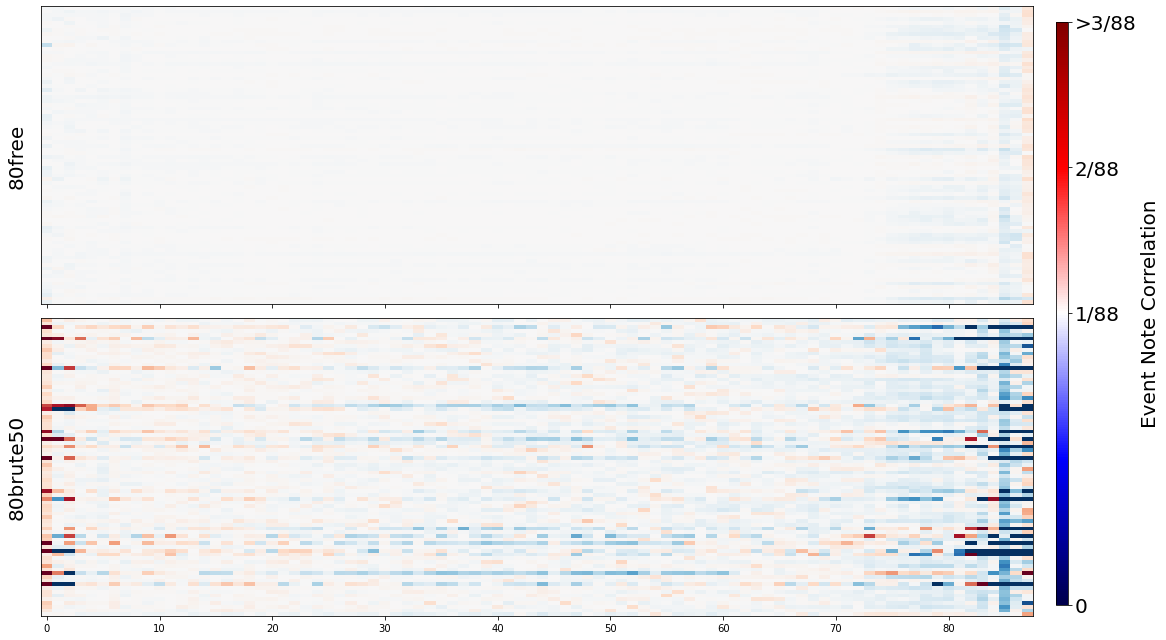

In [26]:
hr = list(4*np.ones(len(model_names),dtype = int))
fig,ax = plt.subplots(len(model_names),figsize=(16,9),sharex = True,gridspec_kw={'height_ratios': hr})
fs = 20
min_note = 21
max_note = 109
Delta = max_note-min_note

MAX = 3/Delta
MID =1/Delta
NORM = MidpointNormalize(midpoint=MID,vmin=0,vmax=MAX,clip=True)


for i,model in enumerate(model_names):

    pp = peak_prominence(Data[model]['corr'])[:,min_note:max_note]
    pp = pp/(pp.sum(1))[:,None]
    c = ax[i].imshow(pp,aspect = 'auto',clim=(0,MAX),interpolation='none',cmap=cmap,norm=NORM)

    ax[i].yaxis.label.set_fontsize(fs)
    ax[i].yaxis.set_tick_params(labelsize=fs)
    ax[i].tick_params(
        axis='y',         # changes apply to the y-axis
        which='both',     # both major and minor ticks are affected
        left=False,       # ticks along the left edge are off
        right=False,      # ticks along the top edge are off
        labelleft = False)         
    ax[i].set_ylabel(f"{model}",labelpad = 15)

fig.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.06, 0.01, 0.9])

cb = mpl.colorbar.ColorbarBase(cbar_ax,cmap='seismic',ticks=[0, 0.5,0.75, 1])
cb.ax.set_yticklabels(["0",f"1/{Delta}",f"2/{Delta}",f">3/{Delta}"])
cb.ax.set_ylabel("Event Note Correlation")
cb.ax.yaxis.label.set_fontsize(fs)
cb.ax.yaxis.set_tick_params(labelsize=fs)

plt.savefig(f'dense_sparse_{Delta}.png',transparent = True)
plt.savefig(f'dense_sparse_{Delta}.svg',transparent = True)
plt.show()

In [ ]:
# Theoretical Bitrate plot

/tmp/ipykernel_1380/2745002173.py:5: RuntimeWarning: divide by zero encountered in log2
  ax.plot(x,1+np.log2(x)/10,color='forestgreen', label = "SPARSE")


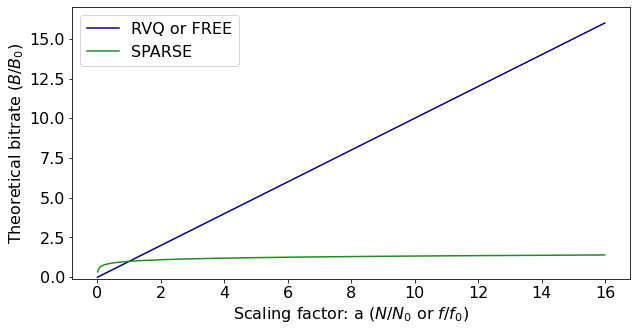

In [71]:
fs = 16
fig,ax = plt.subplots(1,figsize=(10,5))
x = np.arange(1600)/100
ax.plot(x,x,color='navy', label = "RVQ or FREE")
ax.plot(x,1+np.log2(x)/10,color='forestgreen', label = "SPARSE")
ax.set_ylim([-0.1,17])
ax.set_xlabel("Scaling factor: a ($N/N_0$ or $f/f_0$)",fontsize = fs)
ax.set_ylabel("Theoretical bitrate ($B/B_0$)",fontsize = fs)

ax.xaxis.set_tick_params(labelsize =fs)
ax.yaxis.set_tick_params(labelsize=fs)
ax.legend(fontsize = fs)

plt.savefig("images/theoretical_bitrate.svg",transparent = True)

In [11]:
def clist(N,T,S):
    lN = np.ceil(np.log2(N))
    lT = np.ceil(np.log2(T))    
    return S*(lT+lN)
def compN(N,T,S):
    lS = np.ceil(np.log2(S))
    lT = np.ceil(np.log2(T))
    return S*lT +(N+1)*lS
def compT(N,T,S):
    return compN(T,N,S)
                 

(4, 81919)


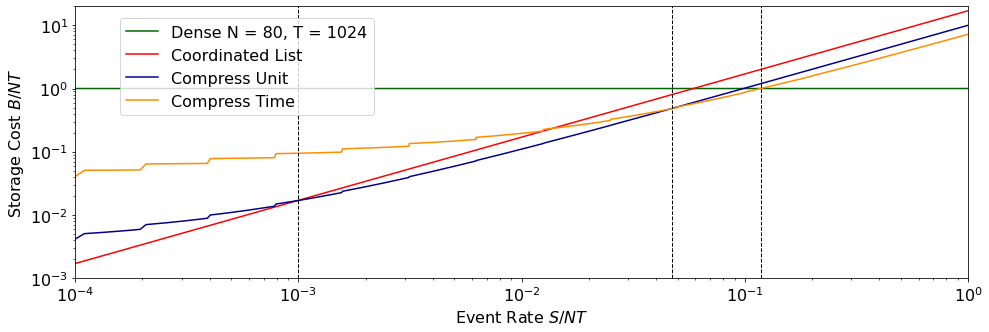

In [13]:
from matplotlib.ticker import NullFormatter, FixedLocator
N = 80
T = 1024
fs = 16
Srange = np.arange(1,N*T)
fig,ax = plt.subplots(figsize = (16,5))
ax.plot(Srange/(N*T),np.ones_like(Srange), color = "darkgreen", label= f"Dense N = {N}, T = {T}")
ax.plot(Srange/(N*T),clist(N,T,Srange)/(N*T), color = 'r', label= "Coordinated List")
ax.plot(Srange/(N*T),compN(N,T,Srange)/(N*T), color = "darkblue", label= "Compress Unit")
ax.plot(Srange/(N*T),compT(N,T,Srange)/(N*T), color = "darkorange", label= "Compress Time")
m = np.array([compT(N,T,Srange)/(N*T),compN(N,T,Srange)/(N*T),clist(N,T,Srange)/(N*T),np.ones_like(Srange)])
print(m.shape)
minimum = [min(a) for a in m.T]
#ax.plot(Srange/(N*T),minimum,color = 'k', label = "minimum")
ax.legend(fontsize=fs, loc = (0.05,0.6))
ax.set_ylabel('Storage Cost $B/NT$',fontsize=fs)
ax.set_xlabel('Event Rate $S/NT$',fontsize=fs)
ax.xaxis.set_tick_params(labelsize =fs)
ax.yaxis.set_tick_params(labelsize=fs)
ax.axvline(x = 0.047,color = 'k',linestyle='--',linewidth=1.)
ax.axvline(x = 0.118,color = 'k',linestyle='--',linewidth=1.)
ax.axvline(x = 0.001,color = 'k',linestyle='--',linewidth=1.)


def forward(x):
    return x**(1/10)
def inverse(x):
    return x**10
ax.set_xlim([1e-4,1.])
ax.set_ylim([1e-3,20])

ax.set_yscale('log')
ax.set_xscale('log')

"""ax.set_xscale('function', functions=(forward, inverse))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.xaxis.set_major_locator(FixedLocator([1e-4,1e-3,1e-2,1e-1,1]))
ax.set_xticklabels(["$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","1"])
"""

plt.savefig("images/B_vs_S_log.svg",transparent = True)
plt.show()

ValueError: x and y must be the same size

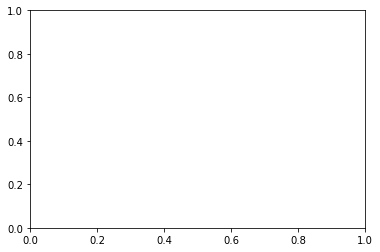

In [14]:
plt.scatter(Data["opus6"]["bps"],Data["opus6"]["sisnr"],alpha=0.1)
plt.ylim([0,12])

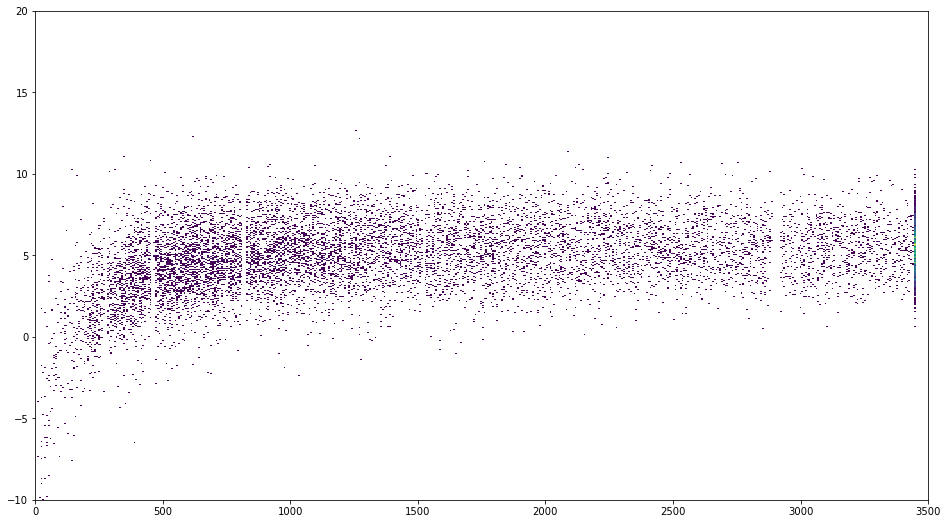

In [65]:
fig, ax = plt.subplots(figsize=(16,9))
h,xed,yed,im = ax.hist2d(Data["80brute50"]["bps"],Data["80brute50"]["sisnr"],bins = [500,500], range = [[0,3500],[-10,20]],cmin = 1)
plt.show()

# Fads

RVQ8x10
[1.52642840e-06 2.05750175e-06 1.49701037e-06 1.66507726e-06
 2.31168775e-06 1.51350514e-06 1.20619594e-06 1.40396080e-06
 1.25731484e-06 3.11130288e-06 1.55039012e-06 1.59620308e-06
 1.22015118e-06 1.77288508e-06 1.23936642e-06 1.48193967e-06
 1.59784599e-06 2.74224627e-06 1.18901694e-06 2.43738418e-06]
FAD: 1.7188707027634344e-06 $\pm$ 5.268498966823577e-07 : Dispersion: 0.3065093237294343
80free
[1.35369901e-06 1.89466793e-06 1.28050320e-06 1.54613623e-06
 1.93429402e-06 1.16724876e-06 1.31412886e-06 1.63604051e-06
 1.28761012e-06 1.65302306e-06 1.66409509e-06 2.13387544e-06
 1.47072450e-06 1.33593287e-06 1.54699821e-06 1.94479413e-06
 1.35347655e-06 1.32080380e-06 1.20216101e-06 2.09393764e-06]
FAD: 1.5567075478075475e-06 $\pm$ 2.945908973748094e-07 : Dispersion: 0.18923971801235787
SPARSE
[4.79960021e-06 3.38452958e-06 5.06851534e-06 4.77539335e-06
 3.83247169e-06 6.42957443e-06 4.23640719e-06 5.15115817e-06
 4.43334115e-06 3.80183751e-06 5.30669080e-06 2.66277371e-06
 4.0

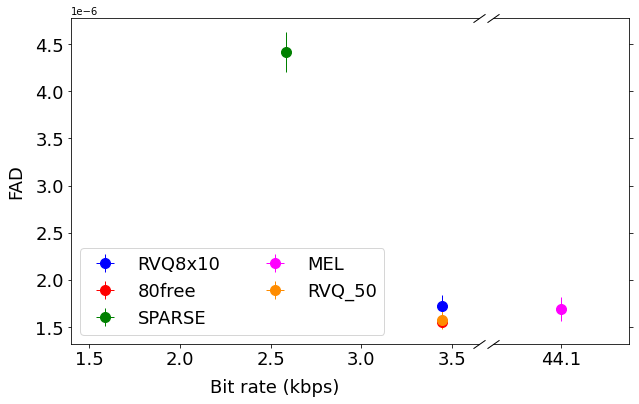

In [62]:
model_list = ['RVQ8x10','80free','SPARSE','bad','MEL','80brute50','RVQ_50']
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10,6),sharey = True,gridspec_kw={'width_ratios': [3,1]})
fs = 18
colors = ['b','r','g','k','magenta','limegreen','darkorange']
for k,model in enumerate(model_list):
    print(model)
    fads = Data[model]['fads']
    y,sy  = np.mean(fads),np.std(fads)/np.sqrt(len(fads))
    
    if model in ['bad']:
        bps = Data['80free']['bps']
    else:
        bps = Data[model]['bps']
        

    x,sx = np.mean(bps)/1000,np.std(bps)/(1000*np.sqrt(len(Data['80free']['bps'])))
    print(fads)
    print(f"FAD: {np.mean(fads)} $\pm$ {np.std(fads)} : Dispersion: {np.std(fads)/np.mean(fads)}")
    for a in [ax,ax2]:
        if model in ['RVQ8x10','80free','SPARSE','MEL','RVQ_50']:
            a.errorbar(x,y,
                       xerr = sx,yerr=sy,
                       label = model,
                       markersize = 10,
                       linewidth=1,
                       fmt='o',
                       zorder = 2,
                       color = colors[k])

ax.xaxis.set_tick_params(labelsize =fs)
ax.yaxis.set_tick_params(labelsize=fs)
ax2.xaxis.set_tick_params(labelsize =fs)
ax2.yaxis.set_tick_params(labelsize=fs)
ax2.yaxis.set_tick_params(labelsize=fs)
ax2.set_xlim([43.9,44.3])
ax.set_xlim([1.4,3.65])

#ax.set_ylim([-0.001,0.0135])
ax.set_ylabel('FAD',fontsize=fs,labelpad = 10)
ax.set_xlabel('Bit rate (kbps)',fontsize=fs,labelpad = 10)
ax2.spines.left.set_visible(False)
ax.spines.right.set_visible(False)

ax2.yaxis.tick_right()
ax2.set_xticks([44.1])


d = 0.7
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([1, 1], [0, 1], transform=ax.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)

ax.legend(ncol = 2,fontsize = fs)#,loc = [0.15,.7])
fig.subplots_adjust(wspace=0.05)

# ViSQOL

Model: FREE
ViSQOL: 3.0066789873000004 +- 0.7382009640905144
bps: 3.4453125 +- 0.0
Model: SPARSE
ViSQOL: 2.92443399075 +- 0.6699099830066896
bps: 2.5868564453125 +- 0.05379620361328125
Model: RVQ8x10
ViSQOL: 2.8529869138999997 +- 0.6343460776499484
bps: 3.4453125 +- 0.0
Model: MEL
ViSQOL: 3.3023087462499996 +- 0.7617385370423196
bps: 44.1 +- 0.0
Model: 80brute50
ViSQOL: 2.74541791345 +- 0.5355213982852951
bps: 1.6001378173828125 +- 1.047250244140625
Model: bad
ViSQOL: 3.0362934007999995 +- 0.7199616185369747
bps: 1.6001378173828125 +- 1.047250244140625
Model: opus6
ViSQOL: 3.8836245393999995 +- 0.44356512301524686
bps: 6 +- 0.0
Model: opus12
ViSQOL: 4.26408569645 +- 0.316189251966901
bps: 12 +- 0.0
Model: opus24
ViSQOL: 4.5609454009 +- 0.11910358994789715
bps: 24 +- 0.0
Model: opus64
ViSQOL: 4.604582901978022 +- 0.10539405796887596
bps: 64 +- 0.0


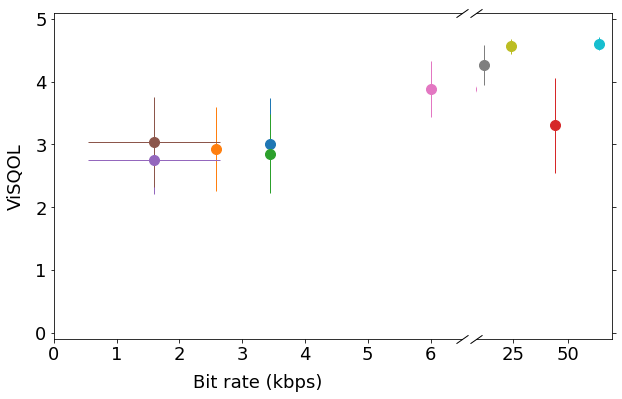

In [25]:
model_list = ['FREE','SPARSE','RVQ8x10','MEL','80brute50','bad','opus6','opus12','opus24','opus64']
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10,6),sharey = True,gridspec_kw={'width_ratios': [3,1]})
fs = 18
for model in model_list:
    data = Data[model]['visqol']
    visqol, svisqol = data['moslqo'].mean(),data['moslqo'].std() 
    print(f'Model: {model}')
    print(f"ViSQOL: {visqol} +- {svisqol}")
    try:
        bps = Data[model]['bps']
        bps,sbps = bps.mean()/1000,bps.std()/1000
    except:
        if model[:4] == "opus":
            bps = int(model[4:])
            sbps = 0.
    print(f"bps: {bps} +- {sbps}")
    for a in [ax,ax2]:
        a.errorbar(bps,visqol,
                   xerr=sbps,yerr = svisqol,
                   label = model,
                   markersize = 10,
                   linewidth=1,
                   fmt='o',
                   zorder = 2,
                   )
    
ax.xaxis.set_tick_params(labelsize =fs)
ax.yaxis.set_tick_params(labelsize=fs)
ax2.xaxis.set_tick_params(labelsize =fs)
ax2.yaxis.set_tick_params(labelsize=fs)
ax2.yaxis.set_tick_params(labelsize=fs)
ax2.set_xlim([8,70])
ax.set_xlim([0,6.5])

ax.set_ylim([-0.1,5.1])
ax.set_ylabel('ViSQOL',fontsize=fs,labelpad = 10)
ax.set_xlabel('Bit rate (kbps)',fontsize=fs,labelpad = 10)
ax2.spines.left.set_visible(False)
ax.spines.right.set_visible(False)

ax2.yaxis.tick_right()


d = 0.7
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([1, 1], [0, 1], transform=ax.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)

#ax.legend(ncol = 4,fontsize = fs)#,loc = [0.15,.7])
fig.subplots_adjust(wspace=0.05) 